In [137]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [240]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,KFold
from category_encoders import TargetEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [241]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
print(train.shape,test.shape)

(1460, 81) (1459, 80)


In [242]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [243]:
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [244]:
Categorical = train.select_dtypes(include = 'object')
Categorical.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [245]:
Categorical.isnull().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

In [246]:
Numerical = train.select_dtypes(include = ["int64","float64"])

In [247]:
Numerical.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [248]:
Numerical.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [249]:
columns_to_impute = ["LotFrontage","GarageYrBlt",'YearRemodAdd','MasVnrArea']
median = train[columns_to_impute].median().iloc[0]
train[columns_to_impute] = train[columns_to_impute].fillna(median)
impute = ['SaleType','GarageCond','GarageQual','GarageFinish','GarageType','Functional','KitchenQual','Electrical','BsmtFinType2','BsmtFinType1','BsmtExposure','BsmtCond','BsmtQual','MasVnrType','Exterior2nd','Exterior1st','Utilities','MSZoning']
mode = train[impute].mode().iloc[0]
train[impute] = train[impute].fillna(mode)
train.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [250]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [251]:
train = train.drop("Id",axis = 1)
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [252]:
train["Old"] = 2023 - train['YearBuilt']
train = train.drop(columns = 'YearBuilt')

In [253]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Old
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,20
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,47
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,22
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,108
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,23


In [254]:
train.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Old
MSSubClass,1.000000,-0.356718,-0.139781,0.032628,-0.059316,0.040581,0.023126,-0.069836,-0.065649,-0.140759,...,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284,-0.027850
LotFrontage,-0.356718,1.000000,0.304522,0.234812,-0.053281,0.083348,0.178885,0.214367,0.042463,0.124098,...,0.137014,0.010287,0.061945,0.037655,0.180819,-0.000255,0.010451,0.006380,0.334771,-0.116685
LotArea,-0.139781,0.304522,1.000000,0.105806,-0.005636,0.013788,0.103767,0.214103,0.111170,-0.002618,...,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843,-0.014228
OverallQual,0.032628,0.234812,0.105806,1.000000,-0.091932,0.550684,0.409320,0.239666,-0.059119,0.308159,...,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982,-0.572323
OverallCond,-0.059316,-0.053281,-0.005636,-0.091932,1.000000,0.073741,-0.127112,-0.046231,0.040229,-0.136841,...,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856,0.375983
YearRemodAdd,0.040581,0.083348,0.013788,0.550684,0.073741,1.000000,0.178333,0.128451,-0.067759,0.181133,...,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101,-0.592855
MasVnrArea,0.023126,0.178885,0.103767,0.409320,-0.127112,0.178333,1.000000,0.262856,-0.071991,0.114099,...,0.124174,-0.109890,0.018915,0.061731,0.011794,-0.029719,-0.006203,-0.008230,0.474457,-0.313755
BsmtFinSF1,-0.069836,0.214367,0.214103,0.239666,-0.046231,0.128451,0.262856,1.000000,-0.050117,-0.495251,...,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420,-0.249503
BsmtFinSF2,-0.065649,0.042463,0.111170,-0.059119,0.040229,-0.067759,-0.071991,-0.050117,1.000000,-0.209294,...,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378,0.049107
BsmtUnfSF,-0.140759,0.124098,-0.002618,0.308159,-0.136841,0.181133,0.114099,-0.495251,-0.209294,1.000000,...,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.034888,-0.041258,0.214479,-0.149040


In [255]:
train.describe(np.arange(0,1,0.1))

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Old
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,69.863699,10516.828082,6.099315,5.575342,1984.865753,103.495205,443.639726,46.549315,567.240411,...,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890,51.732192
std,42.300571,22.027677,9981.264932,1.382997,1.112799,20.645407,180.587278,456.098091,161.319273,441.866955,...,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883,30.202904
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000,13.000000
0%,20.000000,21.000000,1300.000000,1.000000,1.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000,13.000000
10%,20.000000,49.000000,5000.000000,5.000000,5.000000,1950.000000,0.000000,0.000000,0.000000,74.900000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2006.000000,106475.000000,17.000000
20%,20.000000,59.000000,7078.400000,5.000000,5.000000,1961.800000,0.000000,0.000000,0.000000,172.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2006.000000,124000.000000,20.000000
30%,20.000000,60.000000,8063.700000,5.000000,5.000000,1971.000000,0.000000,0.000000,0.000000,280.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,135500.000000,25.700000
40%,30.000000,68.000000,8793.400000,6.000000,5.000000,1980.000000,0.000000,218.600000,0.000000,374.600000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2007.000000,147000.000000,39.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,...,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000,50.000000


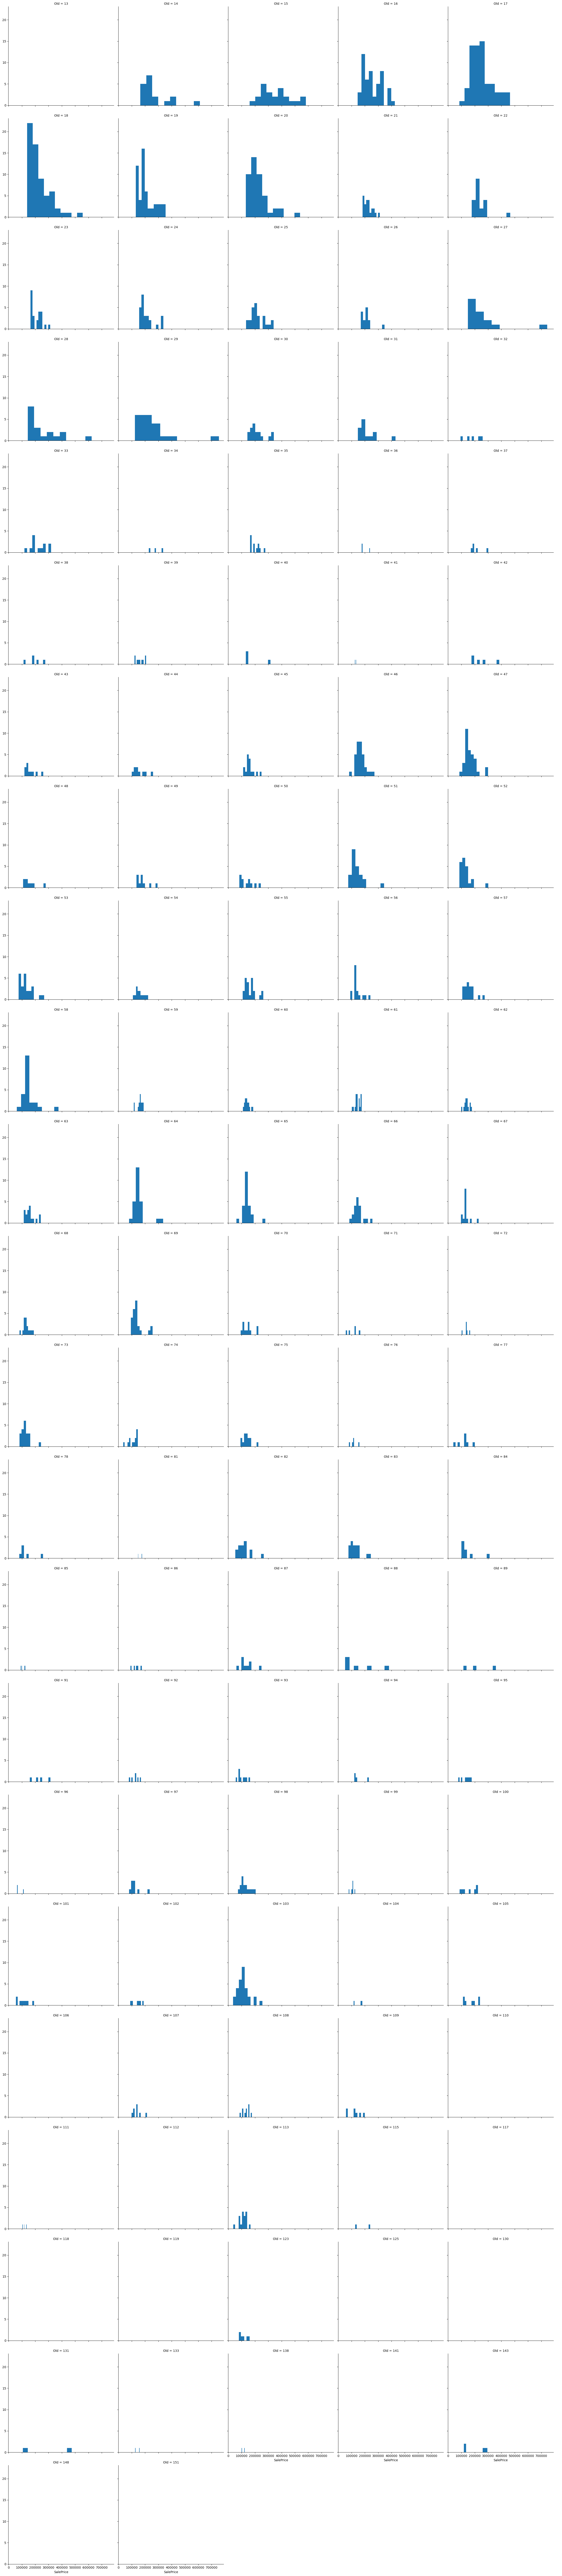

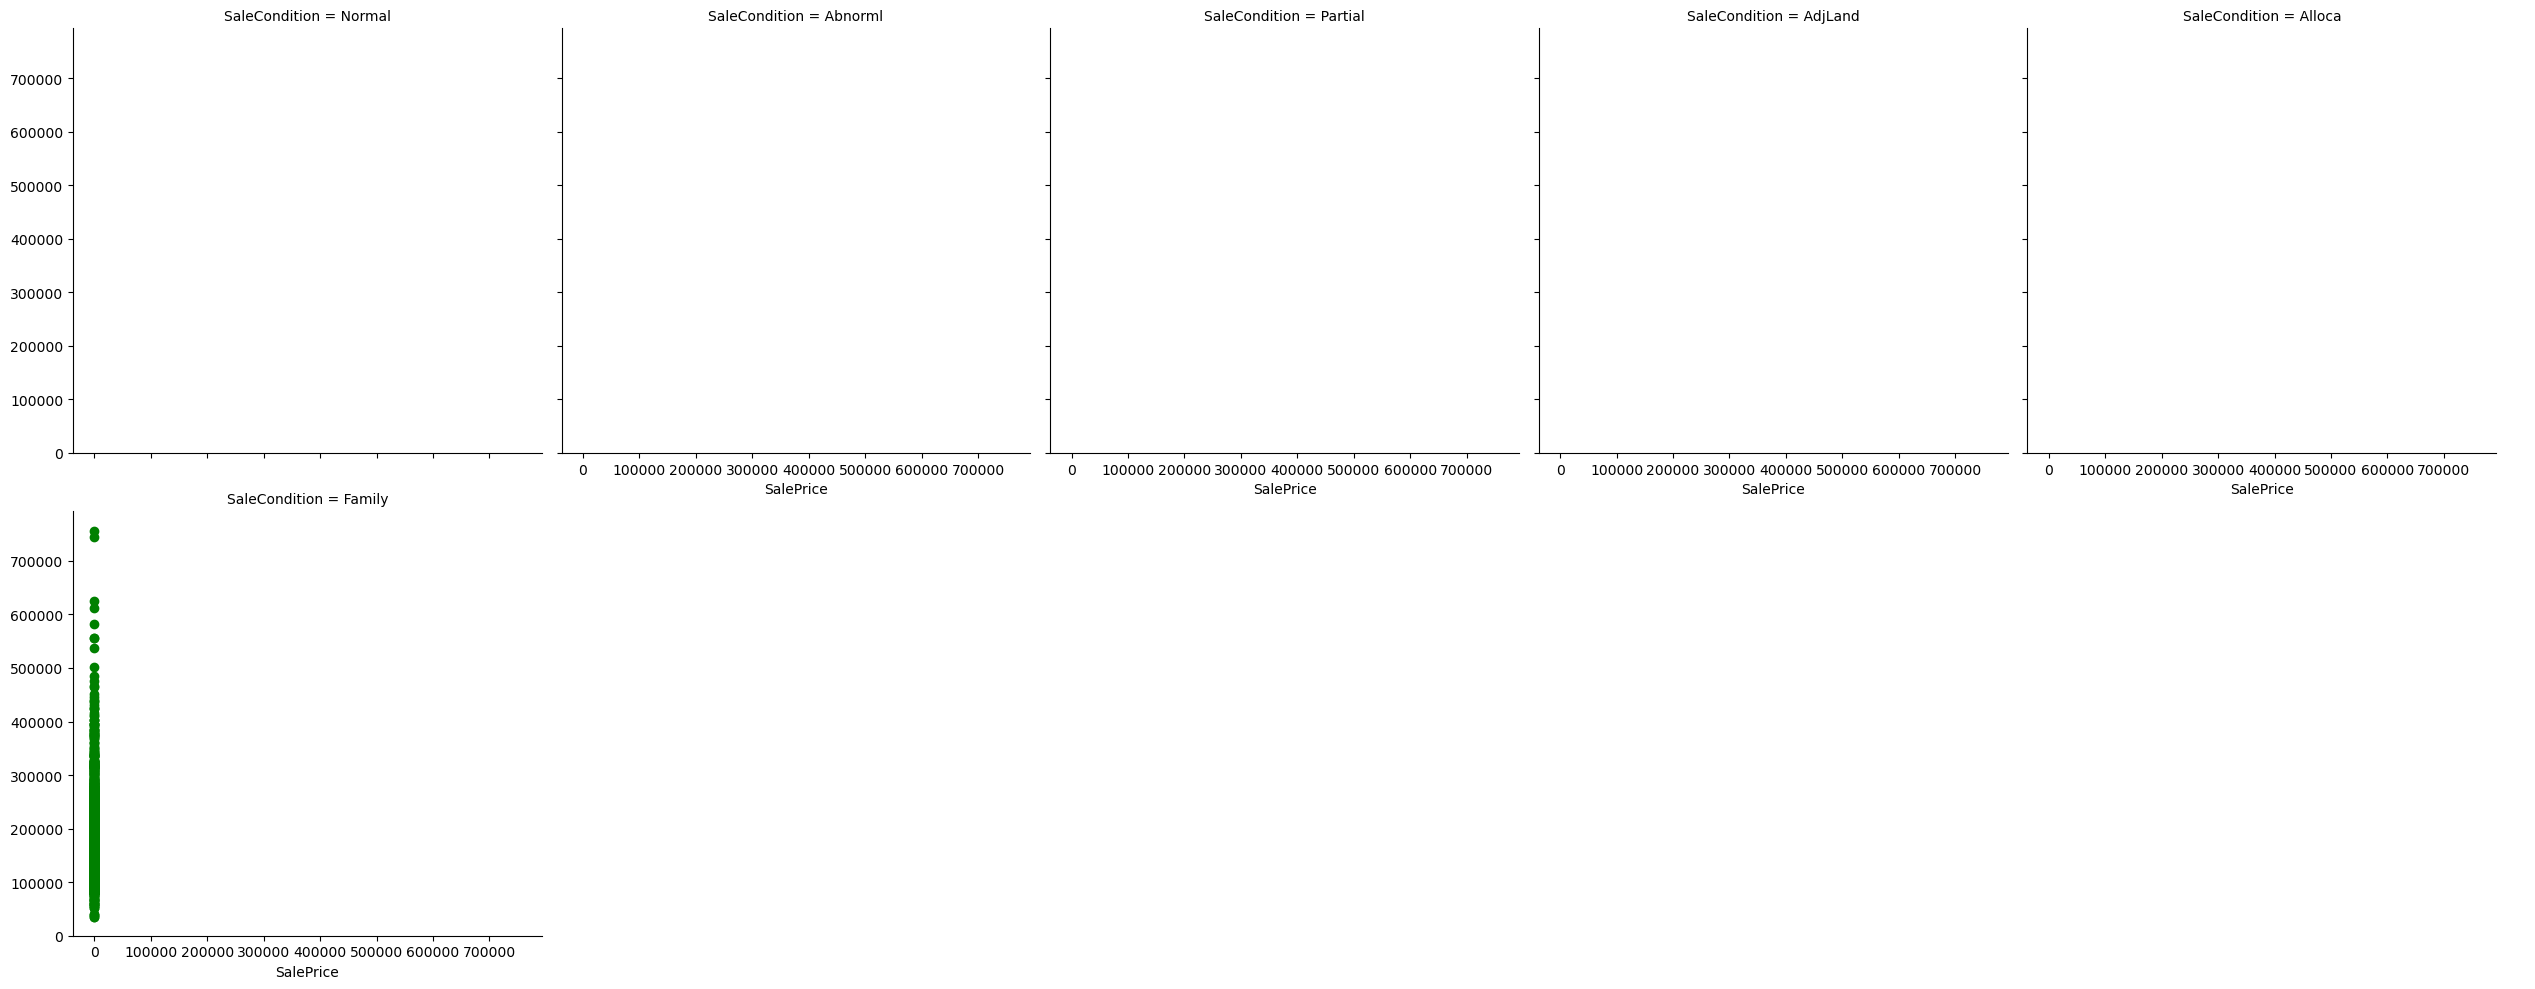

In [256]:
plt.scatter(train.Old,train.SalePrice,c='green')
plt.show()
#inverse releation between the two 

In [257]:
sns.FacetGrid(train, col='Old', size=5, col_wrap=5).map(plt.hist, 'SalePrice').add_legend();
# Max rate for 15-20 years old

In [258]:
sns.FacetGrid(train, col='SaleCondition',size = 5,col_wrap = 5).map(plt.hist,'SalePrice').add_legend();
# Max rae for normal condition

In [259]:
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1
print(IQR,Q3,Q1)

MSSubClass          50.00
LotFrontage         19.00
LotArea           4048.00
OverallQual          2.00
OverallCond          1.00
YearRemodAdd        37.00
MasVnrArea         164.25
BsmtFinSF1         712.25
BsmtFinSF2           0.00
BsmtUnfSF          585.00
TotalBsmtSF        502.50
1stFlrSF           509.25
2ndFlrSF           728.00
LowQualFinSF         0.00
GrLivArea          647.25
BsmtFullBath         1.00
BsmtHalfBath         0.00
FullBath             1.00
HalfBath             1.00
BedroomAbvGr         1.00
KitchenAbvGr         0.00
TotRmsAbvGrd         2.00
Fireplaces           1.00
GarageYrBlt         43.00
GarageCars           1.00
GarageArea         241.50
WoodDeckSF         168.00
OpenPorchSF         68.00
EnclosedPorch        0.00
3SsnPorch            0.00
ScreenPorch          0.00
PoolArea             0.00
MiscVal              0.00
MoSold               3.00
YrSold               2.00
SalePrice        84025.00
Old                 46.00
dtype: float64 MSSubClass           70

In [260]:
list = train.select_dtypes(include = ("object"))

In [261]:
le=LabelEncoder()
for i in list:
    le.fit(train[i])
    train[i]=le.transform(train[i])

In [262]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Old
0,60,3,65.0,8450,1,2,3,3,0,4,...,3,4,4,0,2,2008,8,4,208500,20
1,20,3,80.0,9600,1,2,3,3,0,2,...,3,4,4,0,5,2007,8,4,181500,47
2,60,3,68.0,11250,1,2,0,3,0,4,...,3,4,4,0,9,2008,8,4,223500,22
3,70,3,60.0,9550,1,2,0,3,0,0,...,3,4,4,0,2,2006,8,0,140000,108
4,60,3,84.0,14260,1,2,0,3,0,2,...,3,4,4,0,12,2008,8,4,250000,23


In [263]:
test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [264]:
numerical = test.select_dtypes(include = ["int64",'float64'])
numerical.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      227
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea        15
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       2
BsmtHalfBath       2
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       78
GarageCars         1
GarageArea         1
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [265]:
categorical = test.select_dtypes(include = ['object'])
categorical.isnull().sum()

MSZoning            4
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinType2       42
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
KitchenQual         1
Functional          2
FireplaceQu       730
GarageType         76
GarageFinish       78
GarageQual         78
GarageCond         78
PavedDrive          0
PoolQC           1456
Fence            1169
MiscFeature      1408
SaleType            1
SaleCondition       0
dtype: int64

In [266]:
columns_to_impute = ["LotFrontage","GarageYrBlt",'GarageCars','MasVnrArea','GarageArea','TotalBsmtSF','BsmtUnfSF','BsmtFinSF1','BsmtFinSF2','BsmtFullBath','BsmtHalfBath']
median = test[columns_to_impute].median().iloc[0]
test[columns_to_impute] = test[columns_to_impute].fillna(median)
impute = ['SaleType','GarageCond','GarageQual','GarageFinish','GarageType','Functional','KitchenQual','BsmtFinType2','BsmtFinType1','BsmtExposure','BsmtCond','BsmtQual','MasVnrType','Exterior2nd','Exterior1st','Utilities','MSZoning']
mode = test[impute].mode().iloc[0]
test[impute] = test[impute].fillna(mode)
test.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 80, dtype: int64

In [267]:
drop = ['PoolQC','Fence','MiscFeature','Alley','FireplaceQu']
test = test.drop(drop,axis = 1)

In [268]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,82,0,0,144,0,0,1,2010,WD,Normal


In [269]:
test['Old'] = 2023 - test['YearBuilt']
test = test.drop(columns = ['YearBuilt'])
test = test.drop(columns = ['Id'])
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Old
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,120,0,0,6,2010,WD,Normal,62
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,12500,6,2010,WD,Normal,65
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2010,WD,Normal,26
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2010,WD,Normal,25
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,0,0,144,0,0,1,2010,WD,Normal,31


In [270]:
train.shape,test.shape

((1460, 80), (1459, 74))

In [271]:
missing_features = set(train.columns) - set(test.columns)
print(missing_features)

{'FireplaceQu', 'PoolQC', 'Alley', 'Fence', 'MiscFeature', 'SalePrice'}


In [272]:
missing_features = ['FireplaceQu', 'PoolQC', 'Alley', 'Fence', 'MiscFeature']
train = train.drop(missing_features, axis=1)

In [273]:
list = test.select_dtypes(include = 'object')
le=LabelEncoder()
for i in list:
    le.fit(test[i])
    test[i]=le.transform(test[i])

In [274]:
train.shape,test.shape

((1460, 75), (1459, 74))

In [278]:
random_row = train.sample()
train = train.drop(random_row.index)

In [279]:
X_train = train.drop('SalePrice',axis = 1)
Y_train = train['SalePrice']
X_test = test

In [280]:
missing = set(X_test.columns) - set(X_train.columns)
print(missing)

set()


In [282]:
model_1 =  RandomForestRegressor()
model_1.fit(X_train, Y_train)
Y_pred = model_1.predict(X_test)
accuracy = accuracy_score(Y_train, Y_pred)
print(accuracy)

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets